In [1]:
from sklearn.datasets.samples_generator import make_blobs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

C:\Anaconda3\envs\nlpiaenv\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# prepare multi-class classification dataset
def create_dataset():
    
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2,random_state=2)

    # one hot encode output variable
    y = to_categorical(y)

    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

In [3]:
# fit model with given number of layers, returns test set accuracy
def evaluate_model(n_layers, trainX, trainy, testX, testy):
    
    # configure the model based on the data
    n_input, n_classes = trainX.shape[1], testy.shape[1]

    # define model
    model = Sequential()
    model.add(Dense(10, input_dim=n_input, activation='relu',kernel_initializer='he_uniform'))

    for _ in range(1, n_layers):
        model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
        
        
    model.add(Dense(n_classes, activation='softmax'))

    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # fit model
    history = model.fit(trainX, trainy, epochs=100, verbose=0)

    # evaluate model on test set
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return history, test_acc

In [4]:
# get dataset
trainX, trainy, testX, testy = create_dataset()

layers=1: 1.000
layers=2: 1.000
layers=3: 0.998
layers=4: 0.996
layers=5: 0.190


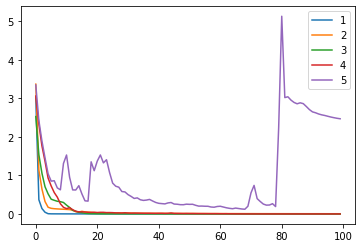

In [6]:
# evaluate model and plot learning curve of model with given number of layers
all_history = list()
num_layers = [1, 2, 3, 4, 5]


for n_layers in num_layers:
    
    # evaluate model with a given number of layers
    history, result = evaluate_model(n_layers, trainX, trainy, testX, testy)
    print('layers=%d: %.3f' % (n_layers, result))
    # plot learning curve
    pyplot.plot(history.history['loss'], label=str(n_layers))
    
pyplot.legend()
pyplot.show()    

In [8]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [7]:
history.history.items()

dict_items([('loss', [3.3464579582214355, 2.4239118099212646, 1.8917609453201294, 1.4564570188522339, 1.0433491468429565, 0.8515125513076782, 0.8615700602531433, 0.675504744052887, 0.625942587852478, 1.3104220628738403, 1.5297553539276123, 0.9506508708000183, 0.6238152980804443, 0.621292769908905, 0.7336775064468384, 0.5191766619682312, 0.3397945165634155, 0.3326111435890198, 1.352791428565979, 1.122241497039795, 1.372398853302002, 1.5307649374008179, 1.325407862663269, 1.4077568054199219, 1.0734655857086182, 0.7993379831314087, 0.7197130918502808, 0.6939966678619385, 0.5812088847160339, 0.5712010860443115, 0.5014315843582153, 0.45529866218566895, 0.4021606147289276, 0.4164987802505493, 0.3679329454898834, 0.35099780559539795, 0.35936471819877625, 0.3765353560447693, 0.3355504274368286, 0.2980523407459259, 0.27511927485466003, 0.2675536572933197, 0.26034724712371826, 0.28576335310935974, 0.2960267961025238, 0.2562466263771057, 0.2518247961997986, 0.24015608429908752, 0.2390243709087371

In [ ]:
'''In this case, we can see that the model is capable of learning the problem well with up to
three layers, then begins to falter. We can see that performance really drops with five layers
and is expected to continue to fall if the number of layers is increased further.'''

In [ ]:
'''A line plot is also created showing cross-entropy loss on the training dataset for each model
configuration (1 to 5 layers) over the 100 training epochs. We can see that the dynamics of the
model with 1, 2, and 3 models (blue, orange and green) are pretty similar, learning the problem
quickly. Surprisingly, training loss with four and five layers shows signs of initially doing well,
then leaping up, suggesting that the model is likely stuck with a sub-optimal set of weights
rather than overfitting the training dataset.'''

In [ ]:
'''The analysis shows that increasing the capacity of the model via increasing depth is a very
effective tool that must be used with caution as it can quickly result in a model with a large
capacity that may not be capable of learning the training dataset easily.'''